In [1]:
%matplotlib inline

In [2]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams["font.size"] = 20

## Simulated Data

In [5]:
num_pos, num_neg = 100, 70
true = num_pos * [1] + num_neg * [0]
pred = np.hstack((0.3 + 0.7 * np.random.rand(num_pos), 0.6 * np.random.rand(num_neg)))

## ROC Curve

Text(0.5, 0, 'False Positive Rate')

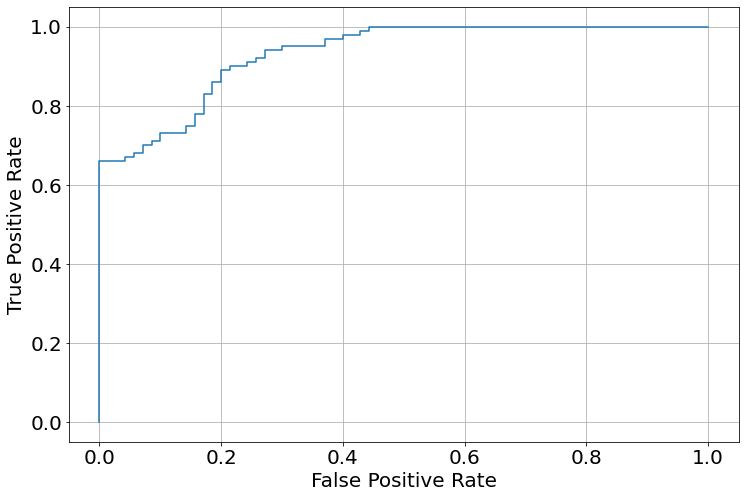

In [6]:
fpr, tpr, roc_threshold = roc_curve(true, pred)
plt.plot(fpr, tpr)
plt.grid()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

### Obtaining the Area Under the ROC Curve

We can use the auc function to find the area under any curve (not just a ROC curve).  There is also a convenience function that generates the ROC curve and then finds the area underneath it.  Either can be used to find the area under the ROC curve.

We demonstrate the use of these functions on our data and verify that we obtain the same values.

In [7]:
auc(fpr, tpr), roc_auc_score(true, pred)

(0.9312857142857143, 0.9312857142857143)

## The Precision-Recall Curve

In [8]:
precision, recall, pr_threshold = precision_recall_curve(true, pred)

In [28]:
confusion_matrix(true, np.ones_like(true), labels=[1, 0])

array([[100,   0],
       [ 70,   0]])

Note that there are one fewer elements in the threshold array than in the precision or recall array.  This is because the first element of the precision and recall arrays correspond to a threshold of 0: (so a precision equal to the true class balance and a recall of 1.0)

In [30]:
(precision.shape, recall.shape, pr_threshold.shape, 
 precision[0], recall[0], pr_threshold[0], num_pos / (num_pos + num_neg))

((132,),
 (132,),
 (131,),
 0.7633587786259542,
 1.0,
 0.3116630440243248,
 0.5882352941176471)

The above result might seem slightly puzzling because the precision value is 0.763 and the recall value is 0.588.  The reason for this difference is that the precision quoted by algorithm ignores all of the negative values
below the minimum prediction value for the positive class.

In [41]:
thresh = min(pred[np.array(true) == 1])
neg_tail = len(pred[pred < thresh])
thresh, neg_tail

(0.3116630440243248, 39)

In [42]:
num_pos / (num_pos + num_neg - neg_tail), precision[0]

(0.7633587786259542, 0.7633587786259542)

### Plot of Precision-Recall Curve

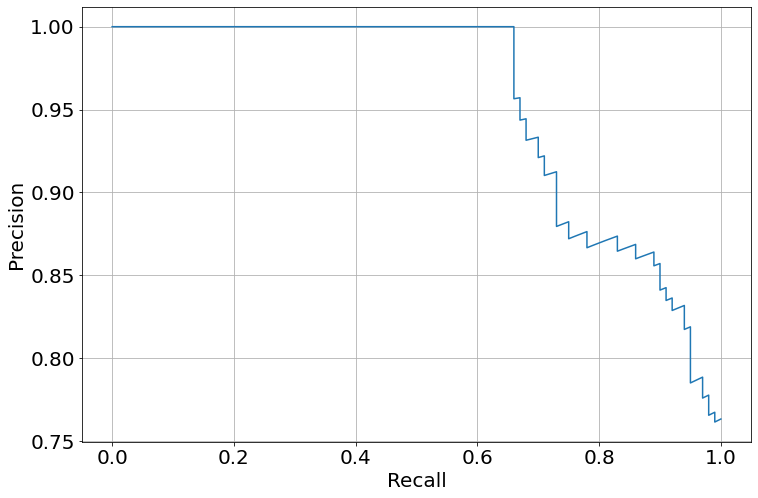

In [9]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

### Area Under Precision- Recall Curve

In [43]:
auc(recall, precision)

0.9532451834839639

## Getting Confusion Matrix for Particular Point

Let's find the confusion matrix for the lowest recall point with recall > 0.8

In [11]:
index, recall_value = [(i, r) for i, r in enumerate(recall) if r > 0.8][-1]
index, recall_value

(38, 0.81)

In [12]:
precision[index], pr_threshold[index], recall_value

(0.8709677419354839, 0.47059328709564313, 0.81)

In [13]:
from sklearn.metrics import confusion_matrix
integer_pred = [1 if pred_value > pr_threshold[index] else 0 for pred_value in pred]
cm = confusion_matrix(true, integer_pred, labels=[1, 0])
[[tp, fn], [fp, tn]] = cm
cm, tp, fn, fp, tn, tp / (tp + fp), tp / (tp + fn)

(array([[80, 20],
        [12, 58]]),
 80,
 20,
 12,
 58,
 0.8695652173913043,
 0.8)

### Here We Use the Confusion Matrix to Validate the PR-Curve Generation Tool

In [14]:
def alternate_pr(true, pred):
    precision = []
    recall = []
    threshold = []
    for thresh in np.linspace(0, 1, 201):
        integer_pred = [1 if pred_value > thresh else 0 for pred_value in pred]
        cm = confusion_matrix(true, integer_pred, labels=[1, 0])
        [[tp, fn], [fp, tn]] = cm
        if tp + fp > 0 and tp + fn > 0:
            precision.append(tp / (tp + fp))
            recall.append(tp / (tp + fn))
            threshold.append(thresh)
    return {"precision": precision, "recall": recall, "threshold": threshold}

In [15]:
pr_dict = alternate_pr(true, pred)

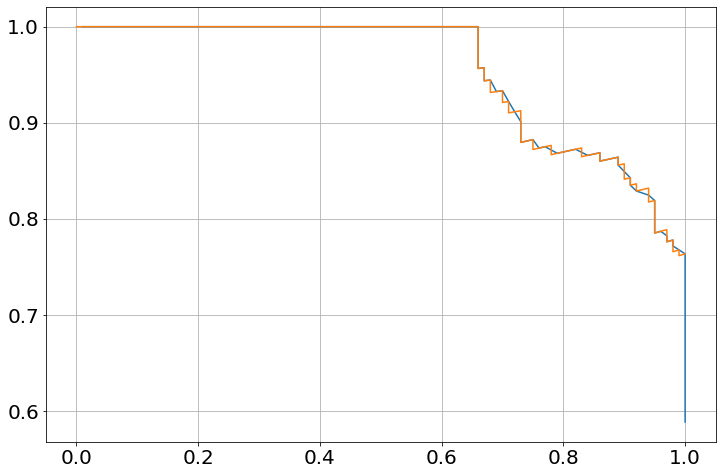

In [16]:
plt.plot(pr_dict["recall"], pr_dict["precision"])
plt.plot(recall, precision)
plt.grid()

In [21]:
precision.shape, pr_threshold.shape

((132,), (131,))

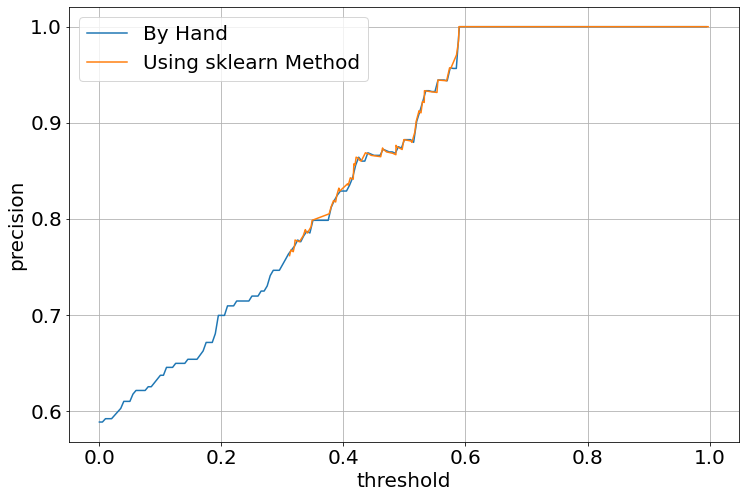

In [47]:
plt.plot(pr_dict["threshold"], pr_dict["precision"], label="By Hand")
plt.plot(pr_threshold, precision[1:], label="Using sklearn Method")
plt.grid()
plt.xlabel("threshold")
plt.ylabel("precision")
plt.legend()

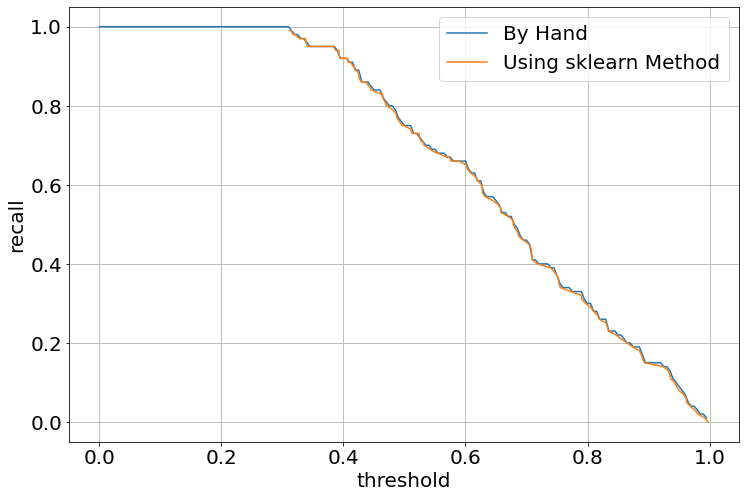

In [48]:
plt.plot(pr_dict["threshold"], pr_dict["recall"], label="By Hand")
plt.plot(pr_threshold, recall[1:], label="Using sklearn Method")
plt.grid()
plt.xlabel("threshold")
plt.ylabel("recall")
plt.legend()